<a href="https://colab.research.google.com/github/mauricionoris/25B3_ml/blob/master/colabs/gradient_descent_complete.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Gradiente Descendente — Notebook Completo (Matemática + Prática)




## 1) Intuição e Derivação Matemática

Queremos minimizar uma função diferenciável

$$ f:\mathbb{R}^d\to\mathbb{R} $$

Pela aproximação de Taylor de 1ª ordem:

$$
f(x + \Delta x) \approx f(x) + \nabla f(x)^\top \Delta x.
$$

Escolhendo

$$\Delta x = -\eta \nabla f(x)$$  

com $\eta>0$ (taxa de aprendizado), obtemos a atualização

$$
x_{t+1} = x_t - \eta \nabla f(x_t).
$$



**Isto move $x$ na direção de descida mais rápida local (direção negativa do gradiente)**.



- Para funções quadráticas convexas: $$f(x)=\tfrac12 x^\top A x - b^\top x$$, com $A$ simétrica positiva definida, existem garantias de convergência para $eta$ adequado (dependendo dos autovalores de $A$).

- **Momentum** acumula uma "velocidade" para suavizar passos e acelerar convergência:
$$
v_{t+1} = \beta v_t - \eta \nabla f(x_t),\quad x_{t+1} = x_t + v_{t+1}.
$$
- **Adam** adapta a taxa por coordenada usando momentos de 1ª e 2ª ordem (médio e variância).

**SGD vs Batch:** Batch usa todo o conjunto para gradiente; SGD usa um exemplo aleatório por passo — mais ruidoso, frequentemente mais rápido por passo e útil em datasets grandes.


In [1]:

# Requisitos e importações
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
# Ajustes visuais rápidos para plots
plt.rcParams['figure.dpi'] = 120
%matplotlib inline
print('numpy, matplotlib e pandas importados.')


numpy, matplotlib e pandas importados.


In [2]:

# Implementações dos otimizadores (numéricas, usando numpy)
def gradient_descent(f, grad_f, x0, lr=0.1, n_iter=100):
    x = np.array(x0, dtype=float)
    path = [x.copy()]
    losses = [float(f(x))]
    for i in range(n_iter):
        g = np.array(grad_f(x), dtype=float)
        x = x - lr * g
        path.append(x.copy())
        losses.append(float(f(x)))
    return np.array(path), np.array(losses)

def gradient_descent_momentum(f, grad_f, x0, lr=0.1, beta=0.9, n_iter=100):
    x = np.array(x0, dtype=float)
    v = np.zeros_like(x)
    path = [x.copy()]
    losses = [float(f(x))]
    for i in range(n_iter):
        g = np.array(grad_f(x), dtype=float)
        v = beta * v - lr * g
        x = x + v
        path.append(x.copy())
        losses.append(float(f(x)))
    return np.array(path), np.array(losses)

def adam(f, grad_f, x0, lr=0.1, beta1=0.9, beta2=0.999, eps=1e-8, n_iter=100):
    x = np.array(x0, dtype=float)
    m = np.zeros_like(x)
    v = np.zeros_like(x)
    path = [x.copy()]
    losses = [float(f(x))]
    for t in range(1, n_iter+1):
        g = np.array(grad_f(x), dtype=float)
        m = beta1*m + (1-beta1)*g
        v = beta2*v + (1-beta2)*(g**2)
        m_hat = m / (1 - beta1**t)
        v_hat = v / (1 - beta2**t)
        x = x - lr * m_hat / (np.sqrt(v_hat) + eps)
        path.append(x.copy())
        losses.append(float(f(x)))
    return np.array(path), np.array(losses)


In [3]:

# Funções de teste e gradientes
def f1_scalar(x):
    x = np.asarray(x)
    return (x - 3.0)**2

def grad_f1_scalar(x):
    x = np.asarray(x)
    return 2*(x - 3.0)

def f2_quadratic(x):
    a = 1.0
    b = 5.0
    return 0.5*(a*x[0]**2 + b*x[1]**2)

def grad_f2_quadratic(x):
    a = 1.0
    b = 5.0
    return np.array([a*x[0], b*x[1]])

def rosenbrock(x):
    a = 1.0
    b = 100.0
    return (a - x[0])**2 + b*(x[1] - x[0]**2)**2

def grad_rosenbrock(x):
    a = 1.0
    b = 100.0
    dx = -2*(a - x[0]) - 4*b*x[0]*(x[1] - x[0]**2)
    dy = 2*b*(x[1] - x[0]**2)
    return np.array([dx, dy])

print('Funções e gradientes definidos.')


Funções e gradientes definidos.


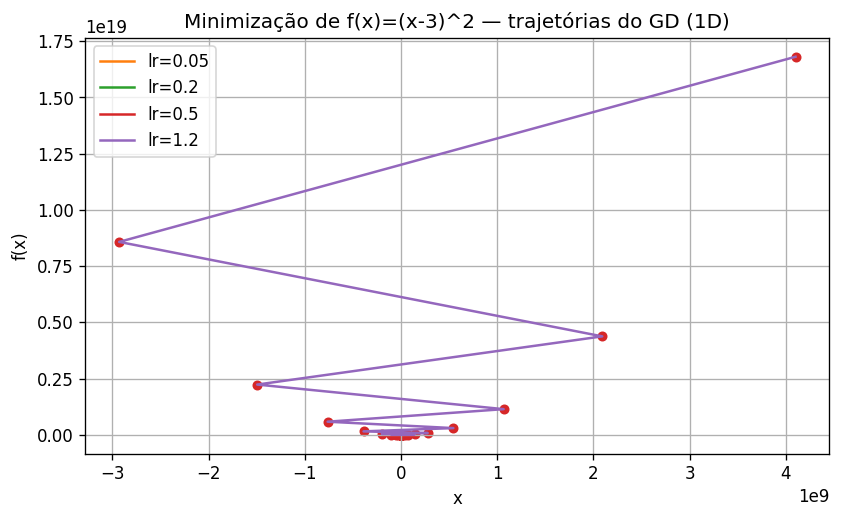

In [6]:

# Experimento 1D: f(x)=(x-3)^2 com várias taxas de aprendizado
x0 = np.array([10.0])
lrs = [0.05, 0.2, 0.5, 1.2]
iters = 60
paths_1d = {}
losses_1d = {}
for lr in lrs:
    path, losses = gradient_descent(lambda x: f1_scalar(x[0]), lambda x: np.array([grad_f1_scalar(x[0])]), x0, lr=lr, n_iter=iters)
    paths_1d[lr] = path.flatten()
    losses_1d[lr] = losses

# Plot da função e trajetórias
xs = np.linspace(-2, 12, 400)
ys = (xs - 3)**2
plt.figure(figsize=(8,4.5))
plt.plot(xs, ys, linewidth=1.2)
for lr in lrs:
    pts = paths_1d[lr]
    plt.scatter(pts, (pts - 3)**2, s=25)
    plt.plot(pts, (pts - 3)**2, label=f'lr={lr}')
plt.title('Minimização de f(x)=(x-3)^2 — trajetórias do GD (1D)')
plt.xlabel('x'); plt.ylabel('f(x)')
plt.legend(); plt.grid(True)
plt.show()



### **Minimização de $f(x) = (x-3)^2$ — trajetórias do GD (1D)**

* Mostra como o **Gradient Descent (GD)** se move ao longo do eixo $x$ tentando minimizar $f(x)$ para diferentes taxas de aprendizado (*learning rate*, lr).
* **lr=0.05 (laranja):** passos curtos, convergência lenta, mas estável.
* **lr=0.2 (verde):** converge mais rápido e suavemente até $x=3$.
* **lr=0.5 (vermelho):** oscila um pouco, mas converge.
* **lr=1.2 (roxo):** divergência — passos muito grandes fazem pular de um lado para outro e escapar do mínimo.


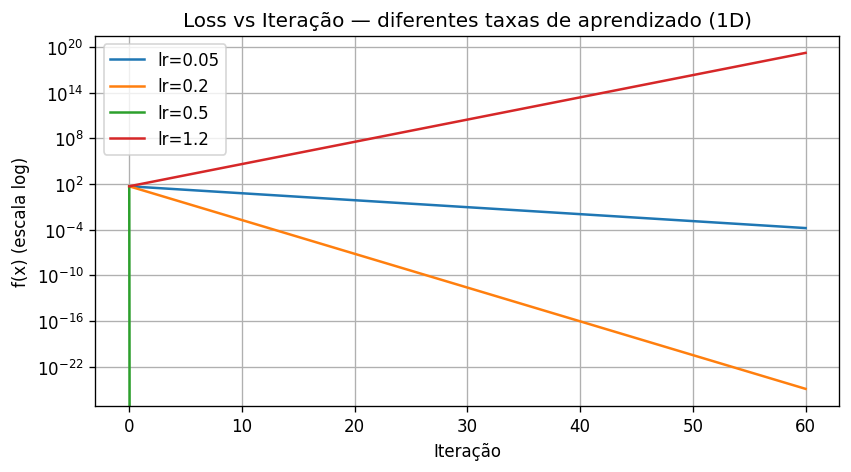

In [5]:
plt.figure(figsize=(8,4))
for lr in lrs:
    plt.plot(losses_1d[lr], label=f'lr={lr}')
plt.yscale('log')
plt.title('Loss vs Iteração — diferentes taxas de aprendizado (1D)')
plt.xlabel('Iteração'); plt.ylabel('f(x) (escala log)')
plt.legend(); plt.grid(True)
plt.show()


### **Loss vs Iteração (1D)**

* Mesma função do gráfico anterior, mas agora mostrando **a perda $f(x)$** ao longo das iterações.
* Eixo $y$ está em **escala log** para mostrar melhor a redução da perda.
* **lr pequeno:** redução lenta.
* **lr ideal (\~0.2):** perda cai rápido e estável.
* **lr grande (1.2):** perda explode, mostrando divergência.


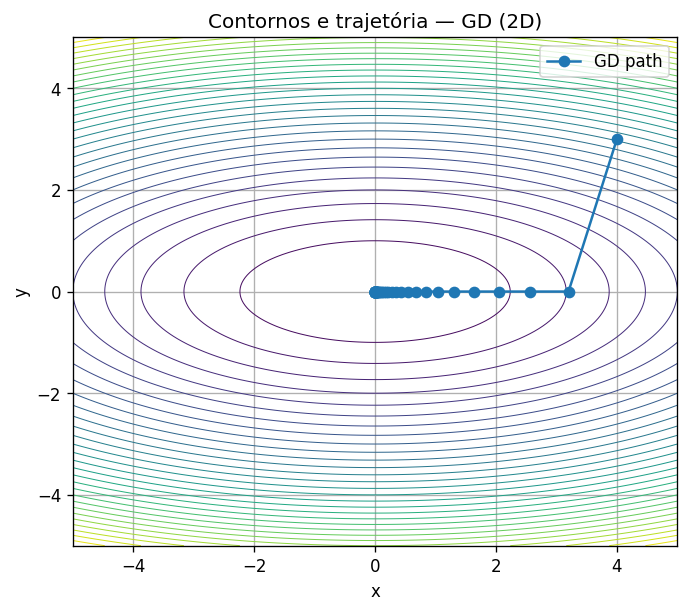

In [7]:

# Experimento 2D (quadrática) — contornos + trajetórias GD vs Momentum
x0_2d = np.array([4.0, 3.0])
path_gd, losses_gd = gradient_descent(lambda x: f2_quadratic(x), grad_f2_quadratic, x0_2d, lr=0.2, n_iter=80)
path_mom, losses_mom = gradient_descent_momentum(lambda x: f2_quadratic(x), grad_f2_quadratic, x0_2d, lr=0.2, beta=0.9, n_iter=80)

xx = np.linspace(-5, 5, 200); yy = np.linspace(-5, 5, 200)
X, Y = np.meshgrid(xx, yy); Z = 0.5*(1.0*X**2 + 5.0*Y**2)

plt.figure(figsize=(6.5,5.5))
plt.contour(X, Y, Z, levels=30, linewidths=0.6)
plt.plot(path_gd[:,0], path_gd[:,1], '-o', label='GD path')
plt.title('Contornos e trajetória — GD (2D)')
plt.xlabel('x'); plt.ylabel('y'); plt.legend(); plt.grid(True)
plt.show()




### **Contornos e trajetória — GD (2D)**

* Função quadrática em 2D com curvas de nível (contornos).
* O caminho mostra o GD partindo de um ponto inicial e seguindo o gradiente negativo.
* Com taxa de aprendizado adequada, a trajetória segue suavemente até o mínimo no centro (0,0).


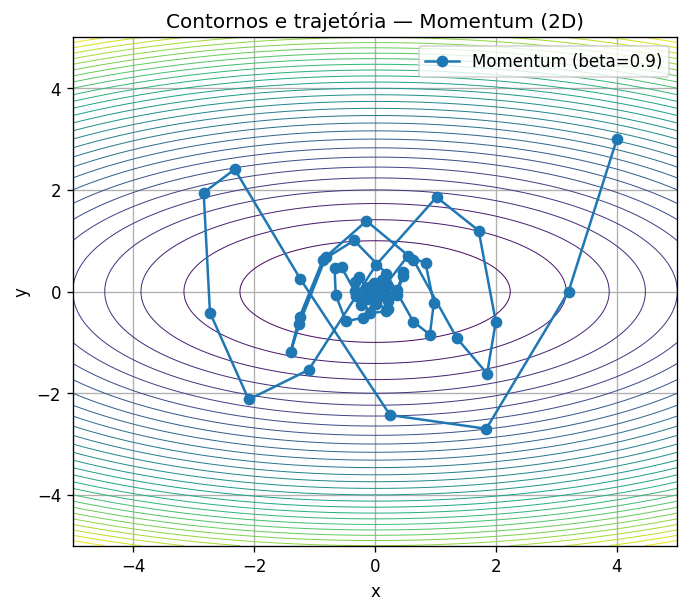

In [8]:
plt.figure(figsize=(6.5,5.5))
plt.contour(X, Y, Z, levels=30, linewidths=0.6)
plt.plot(path_mom[:,0], path_mom[:,1], '-o', label='Momentum (beta=0.9)')
plt.title('Contornos e trajetória — Momentum (2D)')
plt.xlabel('x'); plt.ylabel('y'); plt.legend(); plt.grid(True)
plt.show()



### **Contornos e trajetória — Momentum (2D)**

* Mesmo problema anterior, mas usando **GD com Momentum** ($\beta=0.9$).
* O Momentum acumula velocidade, mas aqui está exagerado — resultando em um caminho errático, com grandes oscilações antes de estabilizar perto do mínimo.




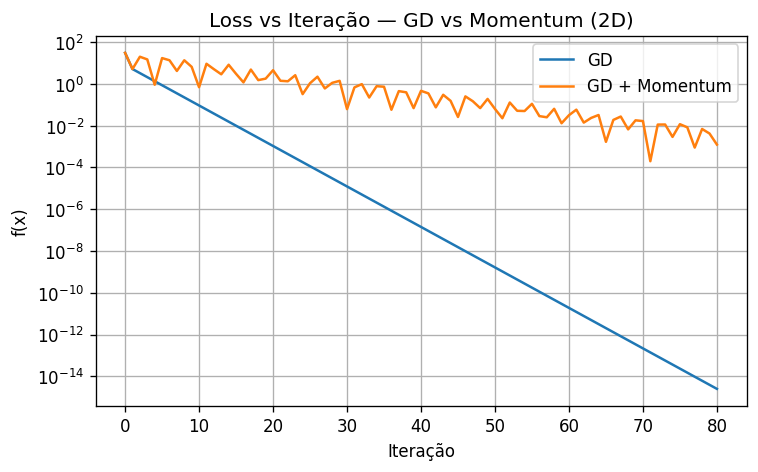

In [9]:
plt.figure(figsize=(7,4))
plt.plot(losses_gd, label='GD'); plt.plot(losses_mom, label='GD + Momentum')
plt.yscale('log'); plt.title('Loss vs Iteração — GD vs Momentum (2D)'); plt.xlabel('Iteração'); plt.ylabel('f(x)')
plt.legend(); plt.grid(True); plt.show()

### **Loss vs Iteração — GD vs Momentum (2D)**

* Compara a perda $f(x)$ ao longo das iterações para GD puro e GD com Momentum.
* **GD puro:** perda cai suavemente e de forma consistente.
* **Momentum:** oscilações grandes e redução mais lenta neste caso, devido a parâmetro de momentum alto e passo inadequado.



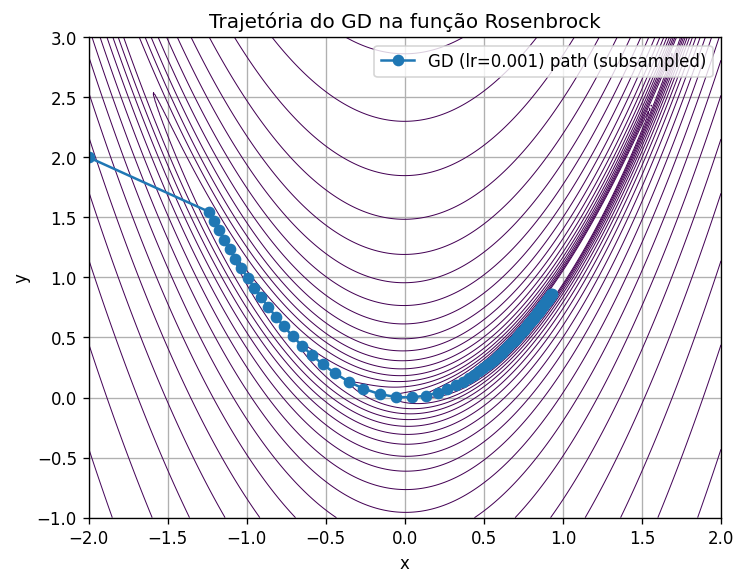

In [10]:

# Rosenbrock — função não-convexa (demonstração de dificuldade)
x0_ros = np.array([-2.0, 2.0])
path_ros, losses_ros = gradient_descent(lambda x: rosenbrock(x), grad_rosenbrock, x0_ros, lr=0.001, n_iter=5000)
sub = path_ros[::50]

xr = np.linspace(-2, 2, 400); yr = np.linspace(-1, 3, 400)
XR, YR = np.meshgrid(xr, yr)
ZR = (1 - XR)**2 + 100*(YR - XR**2)**2

plt.figure(figsize=(6.8,5.2))
plt.contour(XR, YR, ZR, levels=np.logspace(-0.5, 5, 30), linewidths=0.6)
plt.plot(sub[:,0], sub[:,1], '-o', label='GD (lr=0.001) path (subsampled)')
plt.title('Trajetória do GD na função Rosenbrock')
plt.xlabel('x'); plt.ylabel('y'); plt.legend(); plt.grid(True); plt.show()




### **Trajetória do GD na função Rosenbrock**

[Função Rosenbrock - explicação](https://en.wikipedia.org/wiki/Rosenbrock_function)

* A função Rosenbrock tem um vale estreito e curvo — difícil para GD simples.
* Com **lr=0.001**, o GD segue lentamente pelo vale até o mínimo global em (1,1).
* O caminho é suave, mas leva muitas iterações.


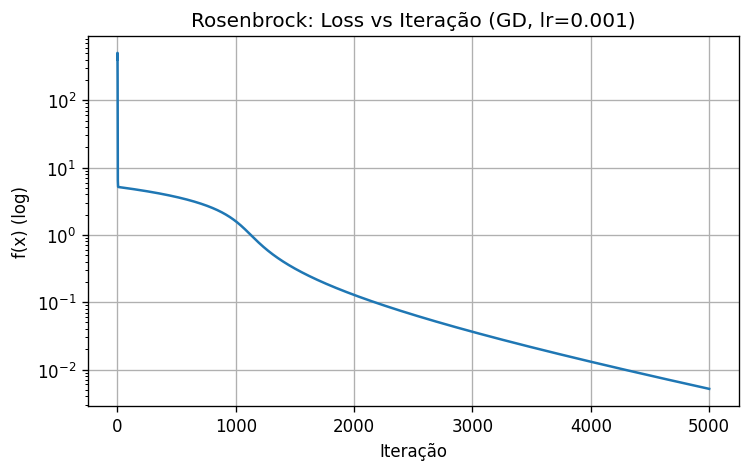

In [11]:
plt.figure(figsize=(7,4))
plt.plot(losses_ros); plt.yscale('log')
plt.title('Rosenbrock: Loss vs Iteração (GD, lr=0.001)'); plt.xlabel('Iteração'); plt.ylabel('f(x) (log)')
plt.grid(True); plt.show()


### **Rosenbrock: Loss vs Iteração**

* Mostra a perda para o caso acima.
* Queda inicial rápida, depois desacelera muito, pois o GD precisa seguir o vale curvo lentamente.
* Escala log deixa claro o decaimento lento após \~1000 iterações.


No contexto de **Machine Learning**, a função de **Rosenbrock** é usada principalmente como **função de teste** para estudar e comparar algoritmos de otimização — não como uma função de perda real para modelos, mas como um *benchmark* artificial.


## **1. Papel da função de Rosenbrock em ML**

* **Propósito:** avaliar quão bem um otimizador (GD, Momentum, Adam, RMSProp etc.) consegue encontrar o mínimo global em um cenário desafiador.
* **Desafio:** o vale estreito e curvado obriga o algoritmo a:

  * Ajustar direção e magnitude do passo frequentemente.
  * Evitar oscilações que podem tirá-lo do vale.
  * Reduzir a taxa de aprendizado para convergir sem divergir.

---

## **2. Fórmula geral**

$$
f(x, y) = (a - x)^2 + b(y - x^2)^2
$$

* Usualmente: $a = 1$, $b = 100$.
* Mínimo global: $(x, y) = (1, 1)$, onde $f = 0$.

---

## **3. Por que é relevante para ML**

* **Treinamento de otimizadores:** antes de aplicar em redes neurais, testam-se otimizadores em funções conhecidas para ajustar hiperparâmetros.
* **Análise de convergência:** ajuda a ver se o método consegue lidar com:

  * Gradientes muito diferentes em direções distintas (condicionamento ruim).
  * Superfícies de perda não esféricas, como as de redes profundas.

---

## **4. Analogia com redes neurais**

* Em redes neurais profundas, a superfície de perda também pode ter **vales estreitos** ou regiões planas, onde:

  * Gradientes são pequenos em uma direção e grandes em outra.
  * Otimizadores simples como GD sofrem, exigindo técnicas como *momentum*, *learning rate schedules* ou adaptativos (Adam, RMSProp).

---

**Referência para Machine Learning:**

* Goodfellow, Bengio, Courville — *Deep Learning*, seção 8.3.1 (*Challenges in Optimization*), onde a função de Rosenbrock é citada como exemplo de função mal-condicionada.
* Link direto para exemplo em Python:
  [https://scipy-lectures.org/advanced/mathematical\_optimization/](https://scipy-lectures.org/advanced/mathematical_optimization/)



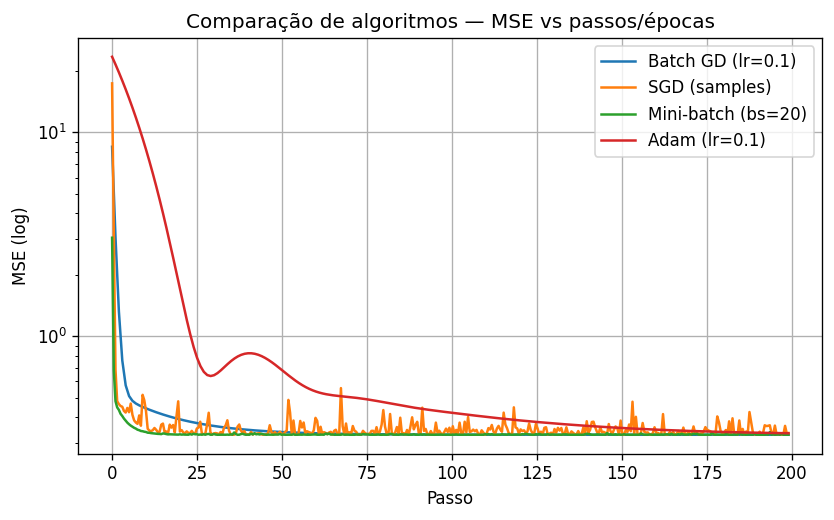

In [12]:

# Regressão linear sintética — comparar Batch GD, SGD, Mini-batch, Adam
np.random.seed(0)
N = 200
X_data = 2*np.random.rand(N,1)
true_w = 3.5; true_b = 1.2
y_data = (X_data.flatten()*true_w) + true_b + np.random.randn(N)*0.6
X_with_bias = np.c_[np.ones((N,1)), X_data]  # N x 2

def mse_loss_wb(wb):
    preds = X_with_bias.dot(wb)
    return np.mean((preds - y_data)**2)

def grad_mse_wb(wb, batch_idx=None):
    if batch_idx is None:
        Xb = X_with_bias; yb = y_data
    else:
        Xb = X_with_bias[batch_idx]; yb = y_data[batch_idx]
    preds = Xb.dot(wb)
    grad = 2.0 * Xb.T.dot(preds - yb) / len(yb)
    return grad

def train_batch_gd(wb0, lr=0.1, epochs=100):
    wb = wb0.copy(); losses = []
    for e in range(epochs):
        grad = grad_mse_wb(wb)
        wb = wb - lr*grad
        losses.append(mse_loss_wb(wb))
    return wb, np.array(losses)

def train_sgd(wb0, lr=0.01, n_steps=2000):
    wb = wb0.copy(); losses = []
    for t in range(n_steps):
        i = np.random.randint(0, N)
        grad = grad_mse_wb(wb, batch_idx=[i])
        wb = wb - lr*grad
        if t%10==0:
            losses.append(mse_loss_wb(wb))
    return wb, np.array(losses)

def train_minibatch(wb0, lr=0.05, epochs=100, batch_size=20):
    wb = wb0.copy(); losses = []; steps = 0
    for e in range(epochs):
        perm = np.random.permutation(N)
        for i in range(0, N, batch_size):
            idx = perm[i:i+batch_size]
            grad = grad_mse_wb(wb, batch_idx=idx)
            wb = wb - lr*grad
            steps += 1
            if steps % 5 == 0:
                losses.append(mse_loss_wb(wb))
    return wb, np.array(losses)

def train_adam_linear(wb0, lr=0.1, epochs=100):
    wb = wb0.copy(); m = np.zeros_like(wb); v = np.zeros_like(wb)
    beta1 = 0.9; beta2 = 0.999; eps = 1e-8; losses = []; t=0
    for e in range(epochs):
        grad = grad_mse_wb(wb)
        t += 1
        m = beta1*m + (1-beta1)*grad
        v = beta2*v + (1-beta2)*(grad**2)
        m_hat = m / (1 - beta1**t)
        v_hat = v / (1 - beta2**t)
        wb = wb - lr*m_hat/(np.sqrt(v_hat)+eps)
        losses.append(mse_loss_wb(wb))
    return wb, np.array(losses)

wb0 = np.array([0.0, 0.0])
wb_batch, loss_batch = train_batch_gd(wb0, lr=0.1, epochs=200)
wb_sgd, loss_sgd = train_sgd(wb0, lr=0.02, n_steps=4000)
wb_mini, loss_mini = train_minibatch(wb0, lr=0.05, epochs=200, batch_size=20)
wb_adam, loss_adam = train_adam_linear(wb0, lr=0.1, epochs=200)

plt.figure(figsize=(8,4.5))
plt.plot(loss_batch, label='Batch GD (lr=0.1)')
plt.plot(np.linspace(0, len(loss_batch)-1, len(loss_sgd)), loss_sgd, label='SGD (samples)')
plt.plot(np.linspace(0, len(loss_batch)-1, len(loss_mini)), loss_mini, label='Mini-batch (bs=20)')
plt.plot(loss_adam, label='Adam (lr=0.1)')
plt.yscale('log')
plt.title('Comparação de algoritmos — MSE vs passos/épocas'); plt.xlabel('Passo'); plt.ylabel('MSE (log)')
plt.legend(); plt.grid(True); plt.show()




### **Comparação de algoritmos — MSE vs Passos/Épocas**

* Problema de regressão com diferentes algoritmos:

  * **Batch GD (azul):** estável, decaimento suave.
  * **SGD (laranja):** muito ruído devido ao uso de apenas 1 amostra por atualização.
  * **Mini-batch (verde):** bom equilíbrio entre velocidade e estabilidade.
  * **Adam (vermelho):** começa devagar (por causa da adaptação de taxas de aprendizado), mas estabiliza com baixo erro.
* Escala log no eixo $y$ para comparar melhor.



In [13]:
summary = pd.DataFrame({
    'algoritmo': ['Batch GD', 'SGD', 'Mini-batch', 'Adam'],
    'final_loss': [loss_batch[-1], loss_sgd[-1], loss_mini[-1], loss_adam[-1]],
    'final_params': [wb_batch.tolist(), wb_sgd.tolist(), wb_mini.tolist(), wb_adam.tolist()]
})
print('\nResumo de resultados:'); display(summary)



Resumo de resultados:


,algoritmo,final_loss,final_params
0,Batch GD,0.328704,"[1.2664312798939281, 3.3666581237219457]"
1,SGD,0.335213,"[1.2533775724814287, 3.352528448823006]"
2,Mini-batch,0.328803,"[1.2607711969001019, 3.362583125328923]"
3,Adam,0.334386,"[1.412202686161832, 3.240513906221543]"



---

### Observações finais
- Altere taxas de aprendizado (`lr`), número de iterações (`n_iter` / `epochs`) e funções objetivo para explorar comportamento.  
- Para grandes iterações, pode demorar (ex.: Rosenbrock com 5000 iterações). Reduza `n_iter` se quiser resultados mais rápidos.


